# A simple NMO model

This notebook goes with [a blog post](http://www.agilegeoscience.com/journal/2014/12/11/the-race-for-useful-offsets.html) from Thursday 11 December 2014. 

We'll start with the usual prelims...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Set up the geometry and define events

In [2]:
# Make time velocity pairs (as in from a velocity analysis)
to = [ 0.30, 0.55, 0.78, 0.98, 1.15, 1.25, 1.40, 1.365, 1.510 ]
z = [ 250, 500, 750, 1000, 1250, 1500, 1750, 1250, 2000 ]
td_pairs = zip(to,z)
print(td_pairs)

Vrms defining the curvature of each reflection is the total distance divided by half the travel time,

In [4]:
Vrms =  2 * np.array(z) / np.array(to)
print(Vrms)

# Let's create a multiple
# replace the second last event so it is the multiple of the 6th reflection
Vrms[-3] = Vrms[5]
print(Vrms)

[1666.66666667 1818.18181818 1923.07692308 2040.81632653 2173.91304348
 2400.         2500.         1831.5018315  2649.00662252]
[1666.66666667 1818.18181818 1923.07692308 2040.81632653 2173.91304348
 2400.         2400.         1831.5018315  2649.00662252]


Define offset range for shot record.

In [5]:
max_offset = 1500 # max offset in metres
rec_spacing = 100
x = np.arange(-1*max_offset, max_offset + 1, rec_spacing)

In [6]:
def hyperbola(x, to, vrms):
    """
    x is offset array
    to is vertical traveltime down to reflection
    vrms is RMS velocity (may need to compute elsewhere in practice)
    """
    term1 = to**2
    term2 = (1/(float(vrms)**2))*x**2
    return np.sqrt( term1 + term2 )

In [7]:
# make direct wave
def direct_wave(x, velocity = 1676):
    return np.abs(x / float(velocity) )

# make first break refraction
def first_break(x, velocity = 2100):
    return np.abs(x / float(velocity) )

# make airwave
def airwave(x, velocity = 343):
    """
    x is offsets
    velocity is the velocity of air (343 m/s)
    """
    return np.abs(x)/float(velocity)

# make Rayleigh wave Ground Roll
def ground_roll(x, velocity = 250):
    """
    x is offsets
    velocity is the velocity of air (250 m/s)
    """
    return np.abs(x)/float(velocity)

## Set up plots and colours

Since we have 7 colours, let's grab seven colors evenly distributed along a colormap using http://colormap.org/.

Assign a sequentially increasing color to each reflection.

In [9]:
# let's give these reflections some colors
colors =  [
                [255 / 255.,0,0],
                [225/ 255.,0,0],
                [190/ 255.,0,0],
                [160/ 255.,0,0],
                [130/ 255.,0,0],
                [100/ 255.,0,0],
                [70/ 255.,0,0],
                [0, 0, 255/ 255.],
                [40/ 255.,0,0]
            ]
print(len(colors[0]))

3


In [10]:
def plot_gather(offsets, tdpairs, ax):
    for i, td, v  in zip(colors, td_pairs, Vrms):
        ax.plot(offsets, hyperbola(offsets, td[0], v), marker = 'o', color = i, lw = 4, alpha = 0.5)
        ax = plt.gca()
        ax.set_ylim(ax.get_ylim()[::-1])
        #ax.set_ylim((np.max(ax.get_ylim())),0)
        ax.set_ylim((1.75, 0))
        ax.set_ylabel(r'two-way time $[s]$')
        ax.set_xlabel('offset [m]')
    return

In [11]:
def put_grid(ax):
    ax.set_xticks(major_xticks)                                                       
    ax.set_xticks(minor_xticks, minor=True)                                           
    ax.set_yticks(major_yticks)                                                       
    ax.set_yticks(minor_yticks, minor=True)  
    

    # and a corresponding grid                                                       
    
    ax.grid(which='both')                                                            
    
    # or if you want differnet settings for the grids:                               
    ax.grid(which='minor', alpha=0.5)                                                
    ax.grid(which='major', alpha=0.75)                                                

    return


In [12]:
# major y-ticks every 0.5, minor ticks every 0.1                                      
major_yticks = np.arange(0., 2.0, 0.5)                                              
minor_yticks = np.arange(0., 1.8, 0.1)  

# major x-ticks every 250, minor ticks every 50                                      
major_xticks = np.arange(-1*max_offset, max_offset+1, 500.)                                              
minor_xticks = np.arange(-1*max_offset, max_offset+1, 100.)  

## Plot everything!

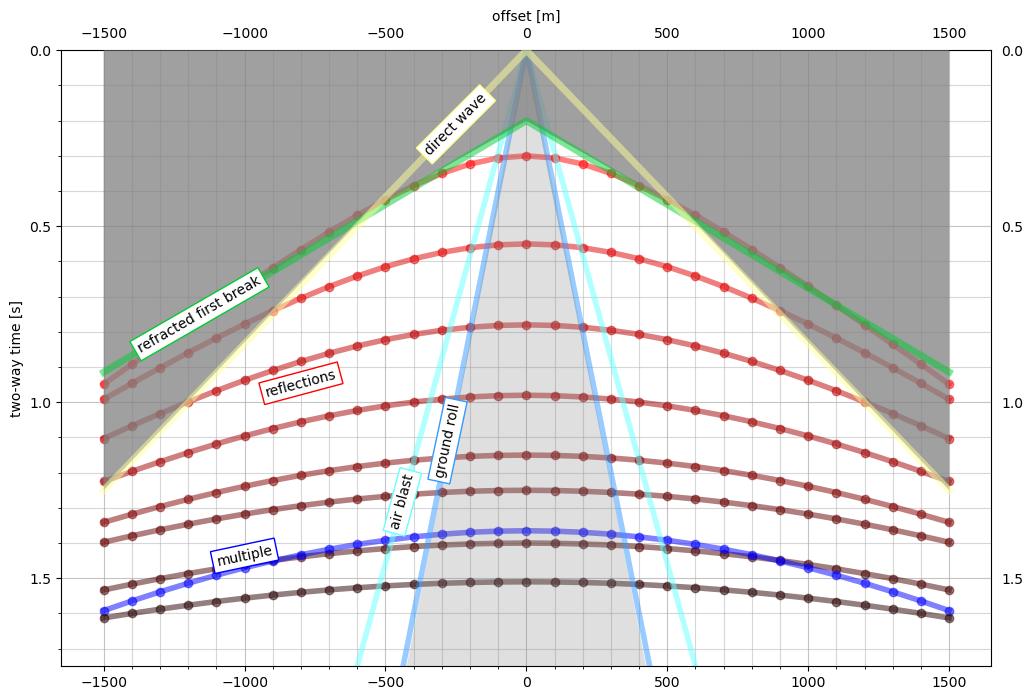

In [13]:
shot_gather = plt.figure(figsize=(12,8), facecolor='w')
mute_ax = shot_gather.add_subplot(111)
plot_gather(x, td_pairs, mute_ax)

alpha = 0.5  # tranparency for direct waves
lw = 0.3     # line weight for direct waves

# direct wave top
mute_ax.plot(x, direct_wave(x, velocity=1200), color='#FFFF99', 
             alpha = alpha, lw=5, label='direct wave',
             zorder = 103)

# direct wave base
#mute_ax.plot(x, 0.1+ direct_wave(x, velocity=1800), 'k-', alpha = alpha, lw=5)

# direct wave base
#mute_ax.plot(x, direct_wave(x, refr_velocity=1700), 'k-', alpha=alpha, lw=5, label='direct first break')

# refracted first break
mute_ax.plot(x, + 0.2 + first_break(x, velocity=2100), color='#00CC33', 
             alpha=alpha, lw=5, label='refracted first break',
             zorder = 102)

# airwave
mute_ax.plot(x, airwave(x), color='#66FFFF', alpha=0.5, lw=4, label='airwave')
# ground roll
mute_ax.plot(x, ground_roll(x), color='#3399FF', alpha=0.5, lw=4, label='ground_roll')

# plot mutes as patches

import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

verts1 = [
        (0., 0.), 
        (0., 0.2),
        (550., 0.45), 
        (1500., 1.25), 
        (1500., 0.), 
        (0., 0.), 
        ]

verts2 = [
        (0., 0.),
        (0., 0.2),
        (-550., 0.45), 
        (-1500., 1.25), 
        (-1500., 0.), 
        (0., 0.), 
        ]
# codes for vertices 1 and 2
codes12 = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

verts3 = [
        (0,0),
        (-425, 1.75),
        (425, 1.75),
        (0,0),
        ]

# codes for verts3 (ground roll)
codes3 = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]


mute1 = Path(verts1, codes12)
mute2 = Path(verts2, codes12)
ground_roll = Path(verts3, codes3)
regions = [mute1, mute2, ground_roll]
alpha = [0.75, 0.75, 0.25]

for i, a in zip(regions, alpha):
    patch = patches.PathPatch(i, facecolor='Grey', alpha = a, lw=0, zorder = 100)
    mute_ax.add_patch(patch)

# set x axis
mute_ax.set_xlabel('offset [m]')
mute_ax.xaxis.set_label_position("top")
#ax.xaxis.set_label_position("top")
# set y axis
mute_ax.set_ylabel('two-way time [s]')
mute_ax.yaxis.set_label_position("left")
# do both sides
mute_ax.tick_params(labeltop=True, labelright=True)
# dress it up with a legend

#legend = mute_ax.legend( frameon = True , loc = 2, shadow=True, fancybox = True)
# Put a nicer background color on the legend.
#legend.get_frame().set_facecolor('w')
#legend.set_zorder(105)

# Label first break 
mute_ax.text(-1160, 0.75, "refracted first break", size=10, rotation=30.,
         ha="center", va="center",
         bbox = dict(boxstyle="square",
                     ec='#00CC33',
                     fc=(1., 1.0, 1.0),
                     alpha = 1.0
                     ),
        zorder = 106
        )
# Label and direct wave
mute_ax.text(-250, 0.115, "direct wave", size=10, rotation=45.,
         ha="center", va="top",
         bbox = dict(boxstyle="square",
                     ec='#FFFF99',
                     fc=(1., 1.0, 1.0),
                     alpha = 1.0
                     ),
         zorder = 107
         )

# Label air blast
mute_ax.text(-440, 1.2, "air blast", size=10, rotation=75.,
         ha="center", va="top",
         bbox = dict(boxstyle="square",
                     ec='#66FFFF',
                     fc=(1., 1.0, 1.0),
                     alpha = 1.0
                     ),
         zorder = 107
         )

# Label air blast
mute_ax.text(-280, 1.0, "ground roll", size=10, rotation=78.,
         ha="center", va="top",
         bbox = dict(boxstyle="square",
                     ec='#3399FF',
                     fc=(1., 1.0, 1.0),
                     alpha = 1.0
                     ),
         zorder = 107
         )

# Label reflections
mute_ax.text(-800, 0.9, "reflections", size=10, rotation=15.,
         ha="center", va="top",
         bbox = dict(boxstyle="square",
                     ec='r',
                     fc=(1., 1.0, 1.0),
                     alpha = 1.0
                     ),
         zorder = 107
         )

# Label multiple
mute_ax.text(-1000, 1.40, "multiple", size=10, rotation=12.,
         ha="center", va="top",
         bbox = dict(boxstyle="square",
                     ec='b',
                     fc=(1., 1.0, 1.0),
                     alpha = 1.0
                     ),
         zorder = 107
         )


plt.draw()

put_grid(mute_ax)

#shot_gather.show()
# if you want to save this
#shot_gather.savefig('muted_moveout.png')